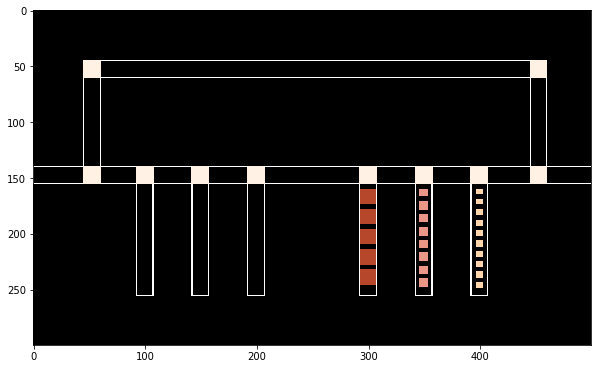

In [2]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#colors used
large_c = '#b7472a'
medium_c= '#eb9788'
small_c = '#ffd5ab'
conveyor = '#fff2e5' 


def render_env():
    """Render in the background of the conveyer"""
    #create the background
    height = 300
    width = 500
    img_array = np.zeros((height, width, 3))

    #transform to PIL object
    im = Image.fromarray(img_array, mode="RGB")

    #draw the system
    draw = ImageDraw.Draw(im)

    # height A
    width_conv  =(0.05)*height
    topleft_c = (.45/5)*width
    top_right = (4.45/5)*width
    down_right = (1.55/3)*height
    length_input = (2.55/3)*height
    large_b = width_conv-2
    small_b = large_b/3
    medium_b = large_b/2

    tote_dist = (0.05/3)* height

    #Conveyor
    draw.rectangle((topleft_c,topleft_c,top_right+width_conv,topleft_c+width_conv)) #A
    draw.rectangle((top_right,topleft_c,top_right+width_conv,down_right)) #B
    draw.rectangle((topleft_c,down_right-width_conv,top_right+width_conv,down_right)) #C, D, F, G, H
    draw.rectangle((topleft_c,topleft_c,topleft_c+width_conv,down_right)) #I

    #out of system
    draw.rectangle((0, down_right-width_conv, topleft_c+width_conv, down_right)) #n10
    draw.rectangle((top_right, down_right-width_conv, width, down_right)) #n10

    #conveyors to GTP
    draw.rectangle(((2/5)*width-0.5*width_conv, down_right-width_conv, (2/5)*width+0.5*width_conv, length_input))
    draw.rectangle(((1.5/5)*width-0.5*width_conv, down_right-width_conv, (1.5/5)*width+0.5*width_conv, length_input))
    draw.rectangle(((1/5)*width-0.5*width_conv, down_right-width_conv, (1/5)*width+0.5*width_conv, length_input))

    #convey from carton storage
    draw.rectangle(((4/5)*width-0.5*width_conv, down_right-width_conv, (4/5)*width+0.5*width_conv, length_input)) #n4
    draw.rectangle(((3.5/5)*width-0.5*width_conv, down_right-width_conv, (3.5/5)*width+0.5*width_conv, length_input)) #n5
    draw.rectangle(((3/5)*width-0.5*width_conv, down_right-width_conv, (3/5)*width+0.5*width_conv, length_input)) #n6

    #transition points
    draw.rectangle((topleft_c, topleft_c, topleft_c+width_conv, topleft_c+width_conv), fill=conveyor) #n1
    draw.rectangle((top_right, topleft_c, top_right+width_conv, topleft_c+width_conv), fill=conveyor) #n2
    draw.rectangle((top_right, down_right-width_conv, top_right+width_conv, down_right), fill=conveyor) #n3
    draw.rectangle((topleft_c, down_right-width_conv, topleft_c+width_conv, down_right), fill=conveyor) #n10

    for x in [(1/5)*width, (1.5/5)*width, (2/5)*width,(3/5)*width, (3.5/5)*width, (4/5)*width]:
        draw.rectangle((x-0.5*width_conv, down_right-width_conv, x+0.5*width_conv, down_right), fill=conveyor) #n4

    ## in storage totes
    # small
    small_totes = 10
    for i in range(small_totes):
        draw.rectangle(((4/5)*width-0.5*small_b, down_right+tote_dist+i*(tote_dist+small_b), (4/5)*width+0.5*small_b, down_right+tote_dist+small_b+i*(tote_dist+small_b)), fill=small_c)

    #medium
    medium_totes = 8
    for i in range(medium_totes):
        draw.rectangle(((3.5/5)*width-0.5*medium_b, down_right+tote_dist+i*(tote_dist+medium_b), (3.5/5)*width+0.5*medium_b, down_right+tote_dist+medium_b+i*(tote_dist+medium_b)), fill=medium_c)

    #large
    large_totes = 5
    for i in range(large_totes):
        draw.rectangle(((3/5)*width-0.5*large_b, down_right+tote_dist+i*(tote_dist+large_b), (3/5)*width+0.5*large_b, down_right+tote_dist+large_b+i*(tote_dist+large_b)), fill=large_c)
    
    return im

im = render_env()

cv2.imshow("", np.array(im))

fig = plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

In [672]:
import random
amount_gtp = 10
amount_output = 3
buffer_size = 10


queues = [[random.choices(np.arange(1,amount_output+1), [0.15, 0.55, 0.30]) for i in range(buffer_size)] for item in range(amount_gtp)] # generate random queues
print(queues)

[[[2], [1], [3], [2], [3], [2], [2], [3], [1], [2]], [[3], [3], [2], [2], [3], [3], [3], [2], [1], [2]], [[1], [2], [2], [2], [3], [3], [2], [3], [3], [1]], [[1], [2], [2], [3], [2], [2], [2], [2], [2], [2]], [[2], [3], [3], [2], [1], [3], [2], [2], [1], [2]], [[2], [3], [2], [3], [1], [3], [3], [2], [3], [2]], [[2], [2], [2], [2], [3], [2], [2], [2], [3], [2]], [[2], [1], [2], [2], [3], [2], [2], [2], [3], [2]], [[2], [2], [2], [3], [3], [3], [2], [1], [3], [2]], [[2], [2], [2], [2], [3], [2], [3], [2], [2], [2]]]


In [673]:
[random.choices(np.arange(1,amount_output+1), [0.15, 0.55, 0.30]) for i in range(buffer_size)]

[[2], [2], [2], [2], [1], [2], [2], [2], [3], [1]]

In [677]:
queues = [random.choices(np.arange(1,amount_output+1), [0.15, 0.55, 0.30], k=buffer_size) for item in range(amount_gtp)] # generate random queues
print(queues)

[[2, 1, 2, 1, 3, 2, 2, 3, 2, 3], [2, 3, 2, 2, 2, 2, 1, 2, 2, 3], [2, 3, 3, 3, 2, 2, 2, 3, 3, 2], [3, 2, 2, 3, 1, 2, 2, 2, 1, 3], [3, 2, 3, 2, 2, 2, 3, 2, 3, 3], [2, 3, 2, 2, 1, 3, 2, 2, 2, 2], [2, 2, 2, 3, 2, 2, 3, 3, 1, 2], [2, 3, 1, 3, 2, 1, 2, 1, 1, 3], [2, 2, 3, 2, 2, 3, 2, 2, 2, 1], [1, 1, 3, 3, 2, 2, 2, 3, 3, 3]]


In [667]:
import numpy as np
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [3]:
steps = 1000
start_location = (400, 150)
current_x = start_location[0]
current_y = start_location[1]


for step in range(steps):
    im = render_env()
    draw = ImageDraw.Draw(im)
    
    #define action space
    if current_y == 150 and current_x >50:
        current_x = current_x -1 
    elif current_x ==50 and current_y > 50:
        current_y = current_y - 1
    elif current_y == 50 and current_x<450:
        current_y = current_y + 1
    else:
        pass
    
    #draw the new location:
    current_coordinates = (current_x - (1/2)*small_b, current_y - (1/2)*small_b, current_x+ (1/2)*small_b, current_y + (1/2) * small_b)
    cv2.imshow("", np.array(im))
    cv2.waitKey(1000)
    


NameError: name 'small_b' is not defined

In [39]:
start_location = (50, 150)
current_x = start_location[0]
current_y = start_location[1]


current_coordinates = (current_x - (1/2)*small_b, current_y - (1/2)*small_b, current_x+ (1/2)*small_b, current_y + (1/2) * small_b)

#if current_y == 150 and 

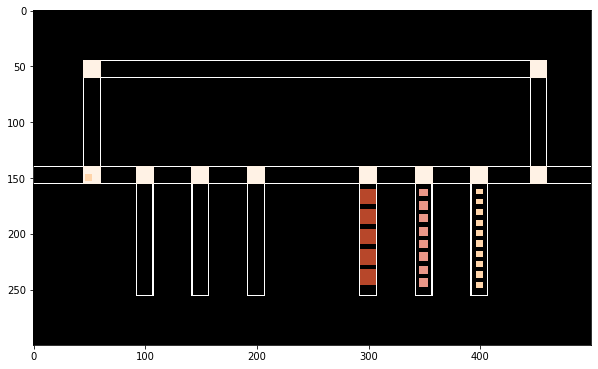

In [40]:
im = render_env()
draw = ImageDraw.Draw(im)
draw.rectangle(current_coordinates, fill=small_c)
fig = plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

# First try on own env
to get familiar with the code

In [201]:
from random import *
class xywalking():
    def __init__(self):
        self.location = (100,100)
        #print("start location = (0,0)")
        
    def step(self):
        x = self.location[0] + randint(-10,10)  *10
        y = self.location[1] + randint(-10,10) *10
        self.location = (x,y)
                    
    def reset(self):
        self.location = (100,100)
    
    def render(self):
        #define shape
        height = 200
        width = 200
        img_array = np.zeros((height, width, 3))

        #transform to PIL object
        im = Image.fromarray(img_array, mode="RGB")

        #draw the system
        draw = ImageDraw.Draw(im)

        #draw rectangle
        x,y = self.location
        draw.rectangle([x-5,y-5,x+5,y+5], fill='#b7472a')

        cv2.imshow("Simulation-v0.1", np.array(im))
        cv2.waitKey(10)

# Start work on the conveyor
## multiple versions
Build in PyCharm, tested here for easy debugging

# V0.1
able to initialize variables, do actions, render with matplotlib

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class simple_conveyor():

    def __init__(self):
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []
        self.queue1 = []
        self.queue2 = []
        self.queue3 = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
    def init_queues(self, queues_list):
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self):
        'removes the oldest instance from queue'
        self.queue1 = self.queue1[1:]
        self.queue2 = self.queue2[1:]
        self.queue3 = self.queue3[1:]
            
    def reset(self):
        "reset all the variables to zero"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []

        #reset this var
        self.O1_location = False
        self.O2_location = False
        self.O2_location = False

    def set_step(self):
        #do some step
        for item in self.items_on_conv:
                #check diverters; is any of them True and is there an order carrier? move into lane.
                if item[0] == [12,7] and self.D1 == True:
                    item[0][1] +=1
                elif item[0] == [8,7] and self.D2 == True:
                    item[0][1] +=1
                elif item[0] == [4,7] and self.D3 == True:
                    item[0][1] +=1
                
                #otherwise; all items set a step in their moving direction 
                elif item[0][1] == 7 and item[0][0] > 2: #if on the lower line, and not reached left corner:
                    item[0][0] -=1                     #move left
                elif item[0][0] ==2 and item[0][1] >2: #if on left lane, and not reached top left corner:
                    item[0][1] -=1                     #move up
                elif item[0][1] == 2 and item[0][0] <28: #if on the top lane, and not reached right top corner:
                    item[0][0] +=1                      #Move right
                elif item[0][0] == 28 and item[0][1] <7: #if on right lane, and not reached right down corner:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][1] < 12:
                    item[0][1] +=1

        #update occupation-states of mergepoints
        if [19,7] in [self.items_on_conv[item][0] for item in range(len(self.items_on_conv))]:
            self.O1_location == True
        if [22,7] in [self.items_on_conv[item][0] for item in range(len(self.items_on_conv))]:
            self.O2_location == True
        if [25,7] in [self.items_on_conv[item][0] for item in range(len(self.items_on_conv))]:
            self.O3_location == True

    def perform_actions_in_space(self):
        #check if any diverters need to be toggled
        
        
        #set step:
        self.set_step()
        
        ###output new order carrier(s)
        #if satisfied; output carrier type1
        if self.O1 == True and self.O1_location == False:
            self.O1_location ==True            #occupy the output
            self.items_on_conv.append([[19,7], 1])
            self.O1 = False                   #turn output off
        
        #if statisfied; output carrier type2
        elif self.O2 == True and self.O2_location == False:
            self.O2_location ==True            #occupy the output
            self.items_on_conv.append([[22,7], 2])
            self.O2 = False                   #turn output off
            
        #if satisfied, output carrier type3
        elif self.O3 == True and self.O3_location == False:
            self.O3_location ==True            #occupy the output
            self.items_on_conv.append([[25,7], 3])
            self.O3 = False                   #turn output off

    def step(self, action):
        if   action==0: self.perform_actions_in_space() #set a step for all items
        elif action==1: self.D1 = not self.D1 #toggle D1
        elif action==2: self.D2 = not self.D2 #Toggle D2
        elif action==3: self.D3 = not self.D3 #Toggle D3
        elif action==4: self.O1 = not self.O1 #toggle O1
        elif action==5: self.O2 = not self.O2 #toggle O2
        elif action==6: self.O3 = not self.O3 #toggle O3
        
        #todo:
        # - Fix returns
        # - build reward function
        # - termination criteria
        # - additional info

    def render(self):
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
        
        
        #define shape
        # height = 200
        # width = 200
        # img_array = np.zeros((height, width, 3))

        # #transform to PIL object
        # im = Image.fromarray(img_array, mode="RGB")

        # #draw the system
        # draw = ImageDraw.Draw(im)

        # #draw rectangle
        # x,y = self.location
        # draw.rectangle([x-5,y-5,x+5,y+5], fill='#b7472a')

        # cv2.imshow("Simulation-v0.1", np.array(im))
        # cv2.waitKey(10)

In [24]:
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor()

In [25]:
env.reset()

items on conveyor:
[[[7, 7], 1], [[12, 8], 2], [[16, 7], 1]]
states of Divert points:
D1 = True, D2 = False, D3 = False
States of output points:
O1 = False, O2 = False, O3 = False
Queue GTP 1: []
Queue GTP 2: []
Queue GTP 3: []


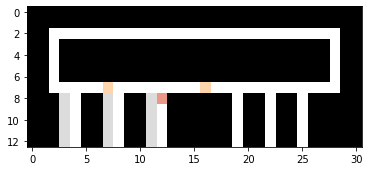

In [39]:
#action 0: #set a step for all items
#action 1: #toggle D1
#action 2: #Toggle D2
#action 3: #Toggle D3
#action 4: #toggle O1
#action 5: #toggle O2
#action 6: #toggle O3
#env.step(1)
env.step(0)
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
env.render()                 #renders the thing on screen

# V0.2
able to make decisions on diverts based on the queues given, therefore able to satisfy demand of the GTP queues

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

class simple_conveyor():

    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues(self.queues)
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []
        self.queue1 = []
        self.queue2 = []
        self.queue3 = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))
        
    def init_queues(self, queues_list):
        """Initialize the queues with items from the queues list: is a nested list"""
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        if quenr == 1:
            self.queue1 = self.queue1[1:]
        if quenr == 2:
            self.queue2 = self.queue2[1:]
        if quenr == 3:
            self.queue3 = self.queue3[1:]     
        
            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []

        #reset this var
        self.O1_location = False
        self.O2_location = False
        self.O2_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))
        self.init_queues(self.queues)

    def set_step(self):
        """For all items on the conveyor, do one step in designated direction"""
        #do some step
        for item in self.items_on_conv:
                #check diverters; is any of them True and is there an order carrier? move into lane.
                if item[0] == [12,7] and self.D1 == True:
                    item[0][1] +=1
                elif item[0] == [8,7] and self.D2 == True:
                    item[0][1] +=1
                elif item[0] == [4,7] and self.D3 == True:
                    item[0][1] +=1
                
                #otherwise; all items set a step in their moving direction 
                elif item[0][1] == 7 and item[0][0] > 2: #if on the lower line, and not reached left corner:
                    item[0][0] -=1                     #move left
                elif item[0][0] ==2 and item[0][1] >2: #if on left lane, and not reached top left corner:
                    item[0][1] -=1                     #move up
                elif item[0][1] == 2 and item[0][0] <28: #if on the top lane, and not reached right top corner:
                    item[0][0] +=1                      #Move right
                elif item[0][0] == 28 and item[0][1] <7: #if on right lane, and not reached right down corner:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][1] < 12 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                    item[0][1] +=1

        #update occupation-states of output points
        if self.carrier_type_map[7][19] == 0:
            self.O1_location = False
        else:
            self.O1_location = True
            
        if self.carrier_type_map[7][22] == 0:
            self.O2_location = False
        else:
            self.O2_location = True
            
        if self.carrier_type_map[7][25] == 0:
            self.O3_location = False
        else:
            self.O3_location = True

    def perform_actions_in_space(self):
        """Does 3 things:
        1. Check if any diverters need to be toggled (based on demand at GTP)
        2. Set a step for all items in the system in their designated direction
        3. outputs any new order carrier at the output point when O1-On == True"""
        
        ## 1. ## check if any diverters need to be toggled
        self.carrier_type_map = np.zeros((13,31,1))
        for item in self.items_on_conv:
                self.carrier_type_map[item[0][1]][item[0][0]] = item[1]
        
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0]:
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0]:
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0]:
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False
            
        ## 2. ## set step:
        self.set_step()
        
        ## 3. ## output new order carrier(s)
        #if satisfied; output carrier type 1
        if self.O1 == True and self.carrier_type_map[7][19] == 0:
            self.O1_location =True            #occupy the output
            self.items_on_conv.append([[19,7], 1])
            self.O1 = False                   #turn output off
        
        #if statisfied; output carrier type 2
        elif self.O2 == True and self.carrier_type_map[7][22] == 0:
            self.O2_location =True            #occupy the output
            self.items_on_conv.append([[22,7], 2])
            self.O2 = False                   #turn output off
            
        #if satisfied, output carrier type 3
        elif self.O3 == True and self.carrier_type_map[7][25] == 0:
            self.O3_location =True            #occupy the output
            self.items_on_conv.append([[25,7], 3])
            self.O3 = False                   #turn output off

    def step(self, action):
        """Step function for the environment, takes an action from the action-space as input"""
        if   action==0: self.perform_actions_in_space() #set a step for all items
        elif action==1: self.D1 = not self.D1 #toggle D1
        elif action==2: self.D2 = not self.D2 #Toggle D2
        elif action==3: self.D3 = not self.D3 #Toggle D3
        elif action==4: self.O1 = not self.O1 #toggle O1
        elif action==5: self.O2 = not self.O2 #toggle O2
        elif action==6: self.O3 = not self.O3 #toggle O3
        
        #todo:
        # - Fix returns
        # - build reward function
        # - termination criteria
        # - additional info

    def render(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #im = Image.fromarray(np.uint8(image))
        #img = im.resize((600,240))
        plt.imshow(np.asarray(image))
        plt.show()
    
    def render_cv2(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #resize with cv2
        out = cv2.resize(np.array(image), (240,600), 'INTER_LINEAR')
        
        #resize with PIL
        #im = Image.fromarray(np.uint8(image))
        #img = im.resize((600,240), resample = 6)
        cv2.imshow("Simulation-v0.1", out)
        cv2.waitKey(0)

In [80]:
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

In [81]:
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print(order_list)
order_action_list = [4 if x == 1 else 5 if x ==2 else 6 for x in order_list]
print(order_action_list)

[1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 2]
[4, 5, 4, 5, 6, 6, 6, 4, 5, 5, 6, 4, 6, 4, 5, 4, 5, 5]


In [82]:
env.reset()

items on conveyor:
[]
states of Divert points:
D1 = False, D2 = False, D3 = False
States of output points:
O1 = False, O2 = False, O3 = False
States of output location:
O1 = False, O2 = False, O3 = False
Queue GTP 1: [1, 2, 3, 2, 3, 1]
Queue GTP 2: [2, 3, 1, 3, 1, 2]
Queue GTP 3: [1, 3, 2, 1, 2, 2]


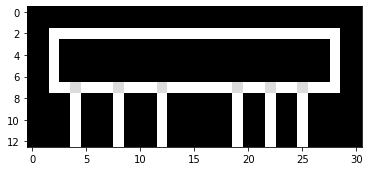

In [83]:
#action 0: #set a step for all items
#action 1: #toggle D1
#action 2: #Toggle D2
#action 3: #Toggle D3
#action 4: #toggle O1
#action 5: #toggle O2
#action 6: #toggle O3
#env.step(6) 
env.step()
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
env.render()                 #renders the thing on screen

In [7]:
#run short trail:
env.reset()

for item in order_action_list:
    env.step(item)
    for _ in range(4):
        env.step(0)
        env.render_cv2()
    
while env.queue1 + env.queue2 + env.queue3 != []:
    env.step(0)
    env.render_cv2()

# V0.3
Adjusted to have a random state-space (based on existing policy) and have requests coming-in in a random fashion. Should be able to have the actions as:

|number|action|
|---|---|
| 0  | output order carrier size S |
| 1 | output order carrier size M |
|2 | output order carrier size L |
|3 | do nothing at output |

policy for the state of the Diverters (D1, D2, D3) is now based on demand from the GTP station:

```python
when:
demand_type at Dn == item_type at Dn:
do divert into lane
```

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

class simple_conveyor():

    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues(self.queues)
        
        #define where the operators of the GTP stations are
        self.operator_locations = [[4,12], [8,12], [12,12]]
        self.output_locations = [[7,19], [7,22], [7,25]]
        self.diverter_locations = [[7,12], [7,8], [7,4]]
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []
        self.queue1 = []
        self.queue2 = []
        self.queue3 = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))

    ## Some helper functions
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        return max([len(sublist) for sublist in listoflists])

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def init_queues(self, queues_list):
        """Initialize the queues with items from the queues list: is a nested list"""
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        if quenr == 1:
            self.queue1 = self.queue1[1:]
        if quenr == 2:
            self.queue2 = self.queue2[1:]
        if quenr == 3:
            self.queue3 = self.queue3[1:]
    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
        
            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = False #output of box size S 
        self.O2 = False #output of box size M
        self.O3 = False #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []

        #reset this var
        self.O1_location = False
        self.O2_location = False
        self.O2_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))
        self.init_queues(self.queues)

    def set_step(self):
        """For all items on the conveyor, do one step in designated direction"""
        #do some step
        for item in self.items_on_conv:
                #check diverters; is any of them True and is there an order carrier? move into lane.
                if item[0] == [12,7] and self.D1 == True:
                    item[0][1] +=1
                elif item[0] == [8,7] and self.D2 == True:
                    item[0][1] +=1
                elif item[0] == [4,7] and self.D3 == True:
                    item[0][1] +=1
                
                #otherwise; all items set a step in their moving direction 
                elif item[0][1] == 7 and item[0][0] > 2 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                    item[0][0] -=1                     #move left
                elif item[0][0] ==2 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                    item[0][1] -=1                     #move up
                elif item[0][1] == 2 and item[0][0] <28 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                    item[0][0] +=1                      #Move right
                elif item[0][0] == 28 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][1] < 12 and item[0][0] < 15 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                    item[0][1] +=1
                elif item[0][1] > 7 and item[0][0] > 15 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                    item[0][1] -=1

        #update occupation-states of output points
        if self.carrier_type_map[7][19] == 0:
            self.O1_location = False
        else:
            self.O1_location = True
            
        if self.carrier_type_map[7][22] == 0:
            self.O2_location = False
        else:
            self.O2_location = True
            
        if self.carrier_type_map[7][25] == 0:
            self.O3_location = False
        else:
            self.O3_location = True

    def perform_actions_in_space(self):
        """Does 3 things:
        1. Check if any diverters need to be toggled (based on demand at GTP)
        2. Set a step for all items in the system in their designated direction
        3. outputs any new order carrier at the output point when O1-On == True"""
        
        ## 1. ## check if any diverters need to be toggled
        self.carrier_type_map = np.zeros((13,31,1))
        for item in self.items_on_conv:
                self.carrier_type_map[item[0][1]][item[0][0]] = item[1]
        
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0] and len(self.queue1) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])):
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0] and len(self.queue2) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][8])):
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0] and len(self.queue3) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][4])):
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False
            
        ## 2. ## set step:
        ## self.set_step()
        
        ## 3. ## output new order carrier(s)
        #if satisfied; output carrier type 1
        if self.O1 == True and self.carrier_type_map[7][19] == 0:
            self.O1_location =True            #occupy the output
            self.items_on_conv.append([[19,8], 1])
            self.O1 = False                   #turn output off
        
        #if statisfied; output carrier type 2
        elif self.O2 == True and self.carrier_type_map[7][22] == 0:
            self.O2_location =True            #occupy the output
            self.items_on_conv.append([[22,8], 2])
            self.O2 = False                   #turn output off
            
        #if satisfied, output carrier type 3
        elif self.O3 == True and self.carrier_type_map[7][25] == 0:
            self.O3_location =True            #occupy the output
            self.items_on_conv.append([[25,8], 3])
            self.O3 = False                   #turn output off

        ## 2. ## set step:
        self.set_step()
        
        
    def step_env(self, action):
        """Step function for the environment, takes an action from the action-space as input"""
        if   action==0: self.perform_actions_in_space() #set a step for all items
        elif action==1: self.D1 = not self.D1 #toggle D1
        elif action==2: self.D2 = not self.D2 #Toggle D2
        elif action==3: self.D3 = not self.D3 #Toggle D3
        elif action==4: self.O1 = not self.O1 #toggle O1
        elif action==5: self.O2 = not self.O2 #toggle O2
        elif action==6: self.O3 = not self.O3 #toggle O3
    
    def step(self, action):
        if action==0:
            self.step_env(0)
        elif action ==1:
            self.step_env(4)
            self.step_env(0)
        elif action ==2:
            self.step_env(5)
            self.step_env(0)
        elif action ==3: 
            self.step_env(6)
            self.step_env(0)

            
        # return next_state, reward, terminate, info

        #todo:
        # - Fix returns
        # - build reward function
        # - termination criteria
        # - additional info

    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        try:
            print(self.len_shortest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])))
        except:
            print('no item to merge argmin error')
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
    
    def render(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240))
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)


In [303]:
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

In [304]:
#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print("Sequence of order is:",  order_list)
order_action_list = [1 if x == 1 else 2 if x ==2 else 3 for x in order_list]
print("Resulting in sequence of actions: ", order_action_list)

Sequence of order is: [1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 2]
Resulting in sequence of actions:  [1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 2]


items on conveyor:
[[[22, 7], 2]]
states of Divert points:
D1 = False, D2 = False, D3 = False
States of output points:
O1 = False, O2 = False, O3 = False
States of output location:
O1 = False, O2 = False, O3 = False
Queue GTP 1: [1, 2, 3, 2, 3, 1]
Queue GTP 2: [2, 3, 1, 3, 1, 2]
Queue GTP 3: [1, 3, 2, 1, 2, 2]
no item to merge argmin error


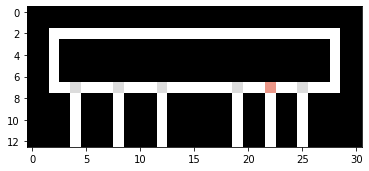

In [305]:
#env.reset()
#env.step(6) 
env.step(2)
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
env.render_plt()                 #renders the thing on screen

# V.03
optimized of the new step action

In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

class simple_conveyor():

######## INITIALIZATION OF VARIABLES ###############################################################################################################
    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues(self.queues)
        
        #define where the operators of the GTP stations are
        self.operator_locations = [[4,12], [8,12], [12,12]]
        self.output_locations = [[7,19], [7,22], [7,25]]
        self.diverter_locations = [[7,12], [7,8], [7,4]]
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))

###### HELPER FUNCTIONS ############################################################################################################################
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        return max([len(sublist) for sublist in listoflists])

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def init_queues(self, queues_list):
        """Initialize the queues with items from the queues list: is a nested list"""
        self.queue1 = queues_list[0]
        self.queue2 = queues_list[1]
        self.queue3 = queues_list[2]
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        if quenr == 1:
            self.queue1.append(variable)
        if quenr == 2:
            self.queue2.append(variable)
        if quenr == 3:
            self.queue3.append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        if quenr == 1:
            self.queue1 = self.queue1[1:]
        if quenr == 2:
            self.queue2 = self.queue2[1:]
        if quenr == 3:
            self.queue3 = self.queue3[1:]
    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
 ########################################################################################################################################################       
 ## RESET FUNCTION 
 #            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []
        
        self.carrier_type_map = np.zeros((13,31,1))
        self.init_queues(self.queues)

########################################################################################################################################################
## STEP FUNCTION
#
    def step_env(self):

####make carrier type map
        self.carrier_type_map = np.zeros((13,31,1))
        for item in self.items_on_conv:
            self.carrier_type_map[item[0][1]][item[0][0]] = item[1]

####toggle diverters if needed
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0] and len(self.queue1) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])):
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0] and len(self.queue2) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][8])):
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0]:  #and len(self.queue3) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][4])):
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False

####Divert when at diverter, and diverter is set to true
####Do step for all items on conv
        for item in self.items_on_conv:
            #check diverters; is any of them True and is there an order carrier? move into lane.
            if item[0] == [12,7] and self.D1 == True:
                item[0][1] +=1
            elif item[0] == [8,7] and self.D2 == True:
                item[0][1] +=1
            elif item[0] == [4,7] and self.D3 == True:
                item[0][1] +=1
            
            #otherwise; all items set a step in their moving direction 
            elif item[0][1] == 7 and item[0][0] > 2 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                item[0][0] -=1                     #move left
            elif item[0][0] ==2 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                item[0][1] -=1                     #move up
            elif item[0][1] == 2 and item[0][0] <28 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                item[0][0] +=1                      #Move right
            elif item[0][0] == 28 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][1] < 12 and item[0][0] < 15 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][0] > 15 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                item[0][1] -=1

        ####try to add new item from output when On!=0
        if self.O1 !=0 and self.carrier_type_map[7][19] == 0:
            self.items_on_conv.append([[19,7], 1])
            self.O1 -=1
        
        elif self.O2 !=0 and self.carrier_type_map[7][22] == 0:
            self.items_on_conv.append([[22,7], 1])
            self.O2 -=1

        elif self.O3 !=0 and self.carrier_type_map[7][25] == 0:
            self.items_on_conv.append([[25,7], 1])
            self.O3 -=1

    def step(self, action):
        if action==0:
            self.step_env()
        elif action ==1: 
            self.O1 +=1
            self.step_env()
        elif action ==2:
            self.O2 +=1
            self.step_env()
        elif action ==3:
            self.O3 +=1
            self.step_env()

   

################## RENDER FUNCTIONS ################################################################################################
    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        try:
            print(self.len_shortest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])))
        except:
            print('no item to merge argmin error')
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
        return image
    
    def render(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        
        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)


In [532]:
## Test the item
queues = [[1,2,3,2,3,1], [2,3,1,3,1,2], [1,3,2,1,2,1]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print("Resulting in sequence of actions: ", order_list)

#run short trail:
env.reset()

Resulting in sequence of actions:  [1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2, 1]


items on conveyor:
[[[12, 7], 1], [[14, 7], 1], [[16, 7], 1], [[18, 7], 1], [[20, 7], 1], [[22, 7], 1]]
states of Divert points:
D1 = False, D2 = False, D3 = False
States of output points:
O1 = 0, O2 = 5, O3 = 0
States of output location:
O1 = False, O2 = False, O3 = False
Queue GTP 1: [1, 2, 3, 2, 3, 1]
Queue GTP 2: [2, 3, 1, 3, 1, 2]
Queue GTP 3: [1, 3, 2, 1, 2, 1]
no item to merge argmin error


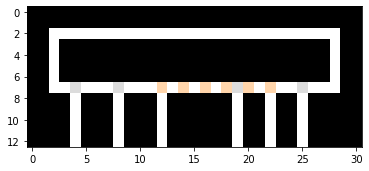

In [545]:
#env.reset()
#env.step(6) 
env.step(2)
#env.init_queues(queues)      #initialize new queues with a nested list
#env.update_queues(1,2)       #add a item to que 1 of size 2
#env.remove_from_queue()      #removes the oldest item in the list from queue
iets = env.render_plt()                 #renders the thing on screen

In [548]:
iets[7]

array([[  0,   0,   0],
       [  0,   0,   0],
       [255, 255, 255],
       [255, 255, 255],
       [220, 220, 220],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [220, 220, 220],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [220, 220, 220],
       [255, 213, 171],
       [255, 255, 255],
       [255, 213, 171],
       [255, 255, 255],
       [255, 255, 255],
       [220, 220, 220],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [  0,   0,   0]])

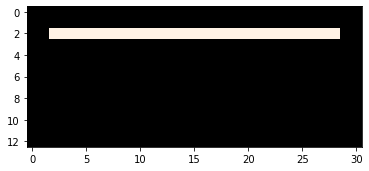

In [528]:
empty = np.zeros((13, 31, 3))
for i in range(2,29):
    empty[2][i]=ColorConverter.to_rgb('#fff2e5')

plt.imshow(empty)
plt.show()

In [396]:

ColorConverter.to_rgb('#fff2e5')

(1.0, 0.9490196078431372, 0.8980392156862745)

In [382]:
n=4
a = np.random.random((n,n,3))
a

array([[[0.09336133, 0.77276212, 0.78701331],
        [0.0732371 , 0.83275724, 0.78854878],
        [0.57200524, 0.47409213, 0.55540461],
        [0.93093142, 0.97142748, 0.92831928]],

       [[0.96165115, 0.92851958, 0.89619634],
        [0.27761218, 0.73176543, 0.74027747],
        [0.13871124, 0.68842066, 0.33340027],
        [0.44121605, 0.48477412, 0.72338449]],

       [[0.66530279, 0.12659082, 0.83494016],
        [0.43945041, 0.36392716, 0.79143307],
        [0.25458848, 0.20693269, 0.70974459],
        [0.16924232, 0.14324789, 0.02767303]],

       [[0.71620035, 0.9132425 , 0.76463804],
        [0.62165498, 0.31209915, 0.07422   ],
        [0.98323731, 0.11639963, 0.89193827],
        [0.17218062, 0.24712219, 0.63762835]]])

<function matplotlib.pyplot.show(*args, **kw)>

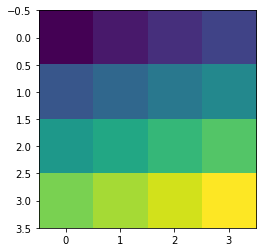

In [380]:
plt.imshow(a)
from matplotlib.colors import ColorConverterplt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


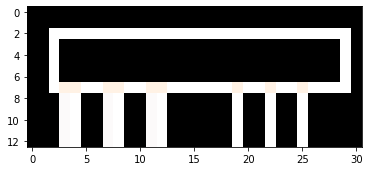

In [420]:
from matplotlib.colors import ColorConverter


plt.imshow(empty)
plt.show()

In [424]:
for i in range(0,3):
    print(i)

0
1
2


In [431]:
#self.empty_env.shape[1] = 31
shape = 31
outputs = 3

[[shape-i*3-6,7]for i in range(outputs)]

[[25, 7], [22, 7], [19, 7]]

# V5
more uniform to changes in shape

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib.colors import ColorConverter

class simple_conveyor():

######## INITIALIZATION OF VARIABLES ###############################################################################################################
    def __init__(self, queues):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues = self.queues
        self.amount_of_gtps = 3
        self.amount_of_outputs = 3
        self.empty_env = self.generate_env(self.amount_of_gtps)

        
        #define where the operators of the GTP stations are
        self.operator_locations = [[i, 12] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        self.output_locations = [[self.empty_env.shape[1]-i*3-6,7]for i in range(self.amount_of_outputs)][::-1]
        self.diverter_locations = [[i, 7] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        
        #initialize divert points: 0=no diversion, 1=diversion
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # self.T1 = 0
        # self.T2 = 0
        # self.T3 = 0

        # #initialize merge points
        # self.M1 = 0
        # self.M2 = 0
        # self.M3 = 0

        self.items_on_conv = []

        #intialize variables for later usage
        self.O1_location = False
        self.O2_location = False
        self.O3_location = False
        
        self.carrier_type_map = np.zeros((13,31,1))

    def generate_env(self, no_of_gtp):
        """returns empty env, with some variables about the size, lanes etc."""
        empty = np.zeros((15, 19+4*no_of_gtp, 3))
        for i in range(2,empty.shape[1]-2):
            empty[2][i]=(255,255,255)
            empty[7][i]=(255,255,255)
        for i in range(2,8):
            empty[i][2]=(255,255,255)
            empty[i][empty.shape[1]-2]=(255,255,255)
        for i in range(8,empty.shape[0]): 
            for j in range(4,no_of_gtp*4+1,4):
                empty[i][j] = (255,255,255)
                empty[i][j-1] = (250, 250,250)
            for j in range(empty.shape[1]-12,empty.shape[1]-5,3):
                empty[i][j] = (255,255,255)
        for i in range(4,no_of_gtp*4+1, 4):
            empty[7][i-1] = (255, 242, 229)
            empty[7][i] = (255, 242, 229)

        for i in range(empty.shape[1]-12,empty.shape[1]-5,3):
            empty[7][i] = (255, 242, 229)

        return empty

###### HELPER FUNCTIONS ############################################################################################################################
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        return max([len(sublist) for sublist in listoflists])

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[i].append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[0]= self.init_queues[1:]
    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
 ########################################################################################################################################################       
 ## RESET FUNCTION 
 #            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D1 = False
        self.D2 = False
        self.D3 = False
        
        #initialize output points
        self.O1 = 0 #output of box size S 
        self.O2 = 0 #output of box size M
        self.O3 = 0 #output of box size L
        
        #empty amount of items on conv.
        self.items_on_conv = []
        
        
        self.init_queues = self.queues
        self.empty_env = self.generate_env(self.amount_of_gtps)
        self.carrier_type_map = np.zeros(self.empty_env.shape)

########################################################################################################################################################
## STEP FUNCTION
#
    def step_env(self):

####make carrier type map
        self.carrier_type_map = np.zeros(self.empty_env.shape)
        for item in self.items_on_conv:
            self.carrier_type_map[item[0][1]][item[0][0]] = item[1]

####toggle diverters if needed
        #toggle D1 if needed:
        try:
            if self.carrier_type_map[7][12] == self.queue1[0] and len(self.queue1) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])):
                self.D1 = True
                self.remove_from_queue(1)
            else:
                self.D1 = False
        except:
            self.D1=False
        
        #toggle D2 if needed:    
        try:
            if self.carrier_type_map[7][8] == self.queue2[0] and len(self.queue2) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][8])):
                self.D2 = True
                self.remove_from_queue(2)
            else:
                self.D2 = False
        except:
            self.D2 = False
        
        #toggle D3 if needed:
        try:
            if self.carrier_type_map[7][4] == self.queue3[0]:  #and len(self.queue3) >= self.len_longest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][4])):
                self.D3 = True
                self.remove_from_queue(3)
            else:
                self.D3 = False
        except:
            self.D3 = False

####Divert when at diverter, and diverter is set to true
####Do step for all items on conv
        for item in self.items_on_conv:
            #check diverters; is any of them True and is there an order carrier? move into lane.
            if item[0] == [12,7] and self.D1 == True:
                item[0][1] +=1
            elif item[0] == [8,7] and self.D2 == True:
                item[0][1] +=1
            elif item[0] == [4,7] and self.D3 == True:
                item[0][1] +=1
            
            #otherwise; all items set a step in their moving direction 
            elif item[0][1] == 7 and item[0][0] > 2 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                item[0][0] -=1                     #move left
            elif item[0][0] ==2 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                item[0][1] -=1                     #move up
            elif item[0][1] == 2 and item[0][0] <28 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                item[0][0] +=1                      #Move right
            elif item[0][0] == 28 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][1] < 12 and item[0][0] < 15 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0:
                item[0][1] +=1
            elif item[0][1] > 7 and item[0][0] > 15 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                item[0][1] -=1

        ####try to add new item from output when On!=0
        if self.O1 !=0 and self.carrier_type_map[7][20] == 0:
            self.items_on_conv.append([[19,7], 1])
            self.O1 -=1
        
        elif self.O2 !=0 and self.carrier_type_map[7][23] == 0:
            self.items_on_conv.append([[22,7], 2])
            self.O2 -=1

        elif self.O3 !=0 and self.carrier_type_map[7][26] == 0:
            self.items_on_conv.append([[25,7], 3])
            self.O3 -=1

    def step(self, action):
        if action==0:
            self.step_env()
        elif action ==1: 
            self.O1 +=1
            self.step_env()
        elif action ==2:
            self.O2 +=1
            self.step_env()
        elif action ==3:
            self.O3 +=1
            self.step_env()

   

################## RENDER FUNCTIONS ################################################################################################
    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points:')
        print('D1 = {}, D2 = {}, D3 = {}'.format(self.D1, self.D2, self.D3))
        print('States of output points:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1, self.O2, self.O3))
        print('States of output location:')
        print('O1 = {}, O2 = {}, O3 = {}'.format(self.O1_location, self.O2_location, self.O3_location))
        print('Queue GTP 1: {}'.format(self.queue1))
        print('Queue GTP 2: {}'.format(self.queue2))
        print('Queue GTP 3: {}'.format(self.queue3))
        try:
            print(self.len_shortest_sublist(self.get_candidate_lists([self.queue1, self.queue2, self.queue3], self.carrier_type_map[7][12])))
        except:
            print('no item to merge argmin error')
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
        plt.imshow(np.asarray(image))
        plt.show()
    
    def render1(self):
        """render with opencv, for faster processing"""
        df = pd.read_csv('representation3.csv', delimiter=';', ).fillna(0)
        listoflists = df.values.tolist()
        image = np.asarray([[(255,255,255) if x =='x' else (220,220,220) if x =='y' else (0,0,0) for x in item] for item in listoflists])

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 
    

        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)

    def render(self):
        """render with opencv, for faster processing"""
        image = self.generate_env(self.amount_of_gtps)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([(255, 213, 171) if item[1] ==1 else (235, 151, 136) if item[1] ==2 else (183, 71, 42)]) 

        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", np.array(img))
        cv2.waitKey(0)

############### MAIN ##############################################################################################################################################

In [475]:
## Test the item
queues = [[1,2,3,2,3], [2,3,1,3,1], [1,3,2,1,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
env = simple_conveyor(queues)
env.reset()

# 5.1

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib.colors import ColorConverter
from copy import copy
from random import randint
import seaborn as sns

class simple_conveyor():

######## INITIALIZATION OF VARIABLES ###############################################################################################################
    def __init__(self, queues, amount_gtp=3, amount_output=3):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues = self.queues



        #init config
        self.amount_of_gtps = amount_gtp
        self.amount_of_outputs = amount_output
        self.empty_env = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)

        #colors
        self.pallette = (np.asarray(sns.color_palette("Reds", self.amount_of_outputs)) * 255).astype(int)

        #define where the operators, diverts and outputs of the GTP stations are
        self.operator_locations = [[i, 12] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        #self.output_locations = [[self.empty_env.shape[1]-i*3-6,7]for i in range(self.amount_of_outputs)][::-1]
        self.output_locations = [[i,7]for i in range(self.empty_env.shape[1]-self.amount_of_outputs*2-1,self.empty_env.shape[1]-2,2)]
        self.diverter_locations = [[i, 7] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        
        print("operator locations: ", self.operator_locations)
        print("output locations: ", self.output_locations)
        print("diverter locations: ", self.diverter_locations)
        #initialize divert points: False=no diversion, True=diversion
        self.D_states = {}
        for i in range(1,len(self.diverter_locations)+1):
            self.D_states[i] = False
        
        #initialize output points
        self.O_states = {}
        for i in range(1,len(self.output_locations)+1):
            self.D_states[i] = 0

        # initialize transition points: 0=no transition, 1=transition
        ## CURRENTLY NOT USED ##
        # T_states = {}
        # for i in range(1,len(self.diverter_locations)+1):
        #     T_states[i] = False

        # #initialize merge points
        # M_states = {}
        # for i in range(1,len(self.diverter_locations)+1):
        #     M_states[i] = False

        self.items_on_conv = []        
        self.carrier_type_map = np.zeros((self.empty_env.shape[0],self.empty_env.shape[1],1))

    def generate_env(self, no_of_gtp, no_of_output):
        """returns empty env, with some variables about the size, lanes etc."""
        empty = np.zeros((15, 4*no_of_gtp + 4 + 3*no_of_output +2, 3))                   # height = 15, width dependent on amount of stations
        for i in range(2,empty.shape[1]-2):
            empty[2][i]=(255,255,255)                               #toplane = 2
            empty[7][i]=(255,255,255)                               #bottom lane = 7
        for i in range(2,8):
            empty[i][1]=(255,255,255)                               #left lane
            empty[i][empty.shape[1]-2]=(255,255,255)                #right lane

        for i in range(8,empty.shape[0]): 
            for j in range(4,no_of_gtp*4+1,4):                      #GTP lanes
                empty[i][j] = (255,255,255)                         #Gtp in
                empty[i][j-1] = (250, 250,250)                      #gtp out
            for j in range(empty.shape[1]-no_of_output*2-1,empty.shape[1]-2,2):   #order carrier lanes
                empty[i][j] = (255,255,255)
        for i in range(4,no_of_gtp*4+1, 4):                         #divert and merge points
            empty[7][i-1] = (255, 242, 229)                         #merge
            empty[7][i] = (255, 242, 229)                           #divert

        for i in range(empty.shape[1]-no_of_output*2-1,empty.shape[1]-2,2):       #output points
            empty[7][i] = (255, 242, 229)

        return empty

###### HELPER FUNCTIONS ############################################################################################################################
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        try:
            return max([len(sublist) for sublist in listoflists]) 
        except:
            return 0

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[i].append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[i]= self.init_queues[i][1:]

    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
 ########################################################################################################################################################       
 ## RESET FUNCTION 
 #            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D_states = {}
        for i in range(1,len(self.diverter_locations)+1):
            self.D_states[i] = False
        
        #initialize output points
        self.O_states = {}
        for i in range(1,len(self.output_locations)+1):
            self.O_states[i] = 0
        
        #empty amount of items on conv.
        self.items_on_conv = []
        
        
        self.init_queues = self.queues
        self.empty_env = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)
        self.carrier_type_map = np.zeros((self.empty_env.shape[0],self.empty_env.shape[1],1))

########################################################################################################################################################
## STEP FUNCTION
#
    def step_env(self):

####make carrier type map
        self.carrier_type_map = np.zeros((env.empty_env.shape[0],env.empty_env.shape[1],1)).astype(int)
        for item in self.items_on_conv:
            self.carrier_type_map[item[0][1]][item[0][0]] = item[1]

####toggle diverters if needed
        #toggle All D_states if needed:
        d_locs = copy(self.diverter_locations)
        carrier_map = copy(self.carrier_type_map)
        queues_local = copy(self.init_queues)
        for loc2 in d_locs:
            #print('Carrier type map value :', carrier_map[loc2[1]][loc2[0]])
            #print('next up item in queue :', queues_local[d_locs.index(loc2)][0])
            try:
                print('first constrain: ', len(self.init_queues[dlocs.index(loc2)]))
                #print('second constrain: ', self.len_longest_sublist(self.get_candidate_lists(self.init_queues, carrier_map[loc2[1]][loc2[0]])))
                if carrier_map[loc2[1]][loc2[0]] == self.init_queues[d_locs.index(loc2)][0] and len(self.init_queues[dlocs.index(loc2)]) >= self.len_longest_sublist(self.get_candidate_lists(self.init_queues, carrier_map[loc2[1]][loc2[0]])): 
                    self.D_states[d_locs.index(loc2)+1] = True
                    print("set diverter state for diverter {} to TRUE".format(d_locs.index(loc2)+1))
                    self.remove_from_queue(d_locs.index(loc2)+1)
                    print("request removed from queue")

                else:
                    self.D_states[d_locs.index(loc2)+1] = False
                    print("Divert-set requirement not met at cord :", loc2)
            except IndexError:
                print('Index error: queues are empty?')
                self.D_states[d_locs.index(loc2)+1] = False
            except:
                print('other error')
                self.D_states[d_locs.index(loc2)+1] = False

#### Toggle diverters 2
        # for cord0 in self.diverter_locations:
        #     dcord = copy(cord0)
        #     if self.carrier_type_map[dcord[1]][dcord[0]] == self.init_queues[self.diverter_locations.index(dcord)][0]:

        

####Divert when at diverter, and diverter is set to true
####Do step for all items on conv
        for item in self.items_on_conv:
            #check diverters; is any of them True and is there an order carrier? move into lane.
            if item[0] in self.diverter_locations:
                try:
                    if self.D_states[self.diverter_locations.index(item[0])+1] == True:
                        item[0][1] +=1
                        print("moved order carrier into GTP lane {}".format(self.diverter_locations.index(loc1)+1))
                    else:
                        item[0][0] -=1 
                except:
                    print("Item of size {} not moved into lane: Divert value not set to true".format(item[1])) 

            #otherwise; all items set a step in their moving direction 
            elif item[0][1] == 7 and item[0][0] > 1 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                item[0][0] -=1                     #move left
                print('item {} moved left'.format(item[0]))
            elif item[0][0] ==1 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                item[0][1] -=1
                print('item {} moved up'.format(item[0]))                    #move up
            elif item[0][1] == 2 and item[0][0] < self.empty_env.shape[1]-2 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                item[0][0] +=1                      #Move right
                print('item {} moved right'.format(item[0]))
            elif item[0][0] == self.empty_env.shape[1]-2 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                item[0][1] +=1
                print('item {} moved down'.format(item[0]))
            elif item[0][1] > 7 and item[0][1] < self.empty_env.shape[0]-1 and item[0][0] < self.amount_of_gtps*4+3 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #move down into lane
                item[0][1] +=1
                print('item {} moved into lane'.format(item[0]))
            elif item[0][1] > 7 and item[0][0] > self.amount_of_gtps*4+3 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0:
                item[0][1] -=1
                print('item {} moved onto conveyor'.format(item[0]))

        ####try to add new item from output when On!=0
        for cord2 in self.output_locations:
            loc =copy(cord2)
            if self.O_states[self.output_locations.index(loc)+1] !=0 and self.carrier_type_map[cord2[1]][cord2[0]+1] ==0:
                self.items_on_conv.append([loc,self.output_locations.index(loc)+1])
                self.O_states[self.output_locations.index(loc)+1] -=1
                print("Order carrier outputted at {}".format(loc))
                print("Items on conveyor: ", self.items_on_conv)
            else:
                print('No order carrier output on output {} .'.format(loc))

    def step(self, action):
        if action==0:
            self.step_env()
            print("- - action 0 executed")
            print("Divert locations :", self.diverter_locations)
            print('states of Divert points = {}'.format(self.D_states))
        elif action ==1: 
            self.O_states[1] +=1
            self.step_env()
            print("- - action 1 executed")
        elif action ==2:
            self.O_states[2] +=1
            self.step_env()
            print("- - action 2 executed")
        elif action ==3:
            self.O_states[3] +=1
            self.step_env()
            print("- - action 3 executed")
        elif action ==4:
            self.O_states[4] +=1
            self.step_env()
        print("states of O: ",self.O_states)
        print('init queues :', self.init_queues)
        print('--------------------------------------------------------------------------------------------------------------------')

   

################## RENDER FUNCTIONS ################################################################################################
    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        print('items on conveyor:')
        print(self.items_on_conv)
        print('states of Divert points = {}'.format(self.D_states))
        print('states of Output points = {}'.format(self.O_states))
        for queue in self.init_queues:
            print('Queue GTP{}: {}'.format(self.init_queues.index(queue), queue))

        image = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([self.pallette[0] if item[1] ==1 else self.pallette[1] if item[1] ==2 else self.pallette[2] if item[1] ==2 else self.pallette[3]]) 
        plt.imshow(np.asarray(image))
        plt.show()
    

    def render(self):
        """render with opencv, for faster processing"""
        image = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([self.pallette[0] if item[1] ==1 else self.pallette[1] if item[1] ==2 else self.pallette[2] if item[1] ==3 else self.pallette[3]]) 

        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((600,240), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))
        cv2.waitKey(0)


In [42]:
############### MAIN ##############################################################################################################################################

## Test the item
amount_gtp = 5
amount_output = 4
buffer_size = 5
queues = [[randint(1,amount_output) for i in range(buffer_size)] for item in range(amount_gtp)] # generate random queues
print(queues)
env = simple_conveyor(queues, amount_gtp, amount_output)
env.reset()

[[1, 3, 2, 1, 4], [2, 3, 1, 1, 4], [3, 3, 2, 4, 4], [1, 2, 4, 1, 4], [2, 4, 3, 2, 4]]
operator locations:  [[20, 12], [16, 12], [12, 12], [8, 12], [4, 12]]
output locations:  [[29, 7], [31, 7], [33, 7], [35, 7]]
diverter locations:  [[20, 7], [16, 7], [12, 7], [8, 7], [4, 7]]


In [30]:
#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print("Resulting in sequence of actions: ", order_list)

Resulting in sequence of actions:  [2, 2, 3, 2, 1, 2, 1, 3, 1, 4, 4, 3, 2, 2, 3, 1, 1, 2, 2, 2, 4, 4, 1, 2, 1]


In [236]:
env.step(0)
env.render()

set diverter state for diverter 1 to TRUE
request removed from queue
Divert-set requirement not met at cord : [16, 7]
Divert-set requirement not met at cord : [12, 7]
Divert-set requirement not met at cord : [8, 7]
Divert-set requirement not met at cord : [4, 7]
Item of size 1 not moved into lane: Divert value not set to true
item [21, 7] moved left
item [21, 7] moved left
item [25, 7] moved left
item [23, 7] moved left
No order carrier output on output [27, 7] .
No order carrier output on output [30, 7] .
No order carrier output on output [33, 7] .
- - action 0 executed
Divert locations : [[20, 7], [16, 7], [12, 7], [8, 7], [4, 7]]
states of Divert points = {1: True, 2: False, 3: False, 4: False, 5: False}


In [238]:
for cord0 in env.diverter_locations:
    loc2 = copy(cord0)
    print(env.carrier_type_map[loc2[1]][loc2[0]], env.init_queues[env.diverter_locations.index(loc2)][0])

[1] [2, 3, 1, 3, 1]
[0] 2
[0] 1
[0] 1
[0] 1


In [239]:
env.init_queues

[[[2, 3, 1, 3, 1], [1, 3, 2, 1, 2], [1, 3, 2, 1, 2], [1, 3, 2, 1, 2]],
 [2, 3, 1, 3, 1],
 [1, 3, 2, 1, 2],
 [1, 3, 2, 1, 2],
 [1, 3, 2, 1, 2]]

In [252]:
from random import randint
amount = 5
[[randint(1,3),randint(1,3),randint(1,3),randint(1,3),randint(1,3)] for item in range(amount)]

[[1, 3, 2, 3, 2],
 [2, 2, 1, 3, 2],
 [3, 1, 3, 3, 2],
 [1, 1, 3, 3, 2],
 [1, 2, 1, 3, 2]]

In [212]:
cord

[4, 7]

In [45]:
env.diverter_locations.index([20,7])

0

In [214]:
np.zeros(env.empty_env.shape[0],env.empty_env.shape[1],1)

TypeError: data type not understood

In [554]:
image = env.generate_env(env.amount_of_gtps)

In [205]:
for cord in env.diverter_locations:
    cord

In [217]:
env.get_candidate_lists(env.init_queues, env.carrier_type_map[cord[1]][cord[0]])

[]

In [218]:
env.diverter_locations

[[20, 7], [16, 7], [12, 7], [8, 7], [4, 7]]

In [40]:
env.divert_locations

AttributeError: 'simple_conveyor' object has no attribute 'divert_locations'

In [594]:
env.carrier_type_map[cord[1]][cord[0]] == env.init_queues[env.diverter_locations.index(cord)][0]

array([False])

In [33]:
for iets in env.diverter_locations:
    print(len(env.init_queues[env.diverter_locations.index(iets)]))

5
5
5
5
5


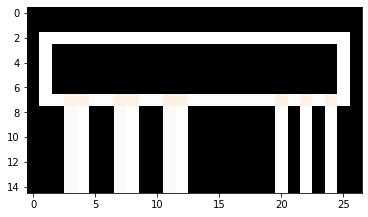

In [270]:
no_of_gtp = 3
no_of_output = 3
empty = np.zeros((15, 4*no_of_gtp + 4 + 3*no_of_output +2, 3))                   # height = 15, width dependent on amount of stations
for i in range(2,empty.shape[1]-2):
    empty[2][i]=(255,255,255)                               #toplane = 2
    empty[7][i]=(255,255,255)                               #bottom lane = 7
for i in range(2,8):
    empty[i][1]=(255,255,255)                               #left lane
    empty[i][empty.shape[1]-2]=(255,255,255)                #right lane

for i in range(8,empty.shape[0]): 
    for j in range(4,no_of_gtp*4+1,4):                      #GTP lanes
        empty[i][j] = (255,255,255)                         #Gtp in
        empty[i][j-1] = (250, 250,250)                      #gtp out
    for j in range(empty.shape[1]-no_of_output*2-1,empty.shape[1]-2,2):   #order carrier lanes
        empty[i][j] = (255,255,255)
for i in range(4,no_of_gtp*4+1, 4):                         #divert and merge points
    empty[7][i-1] = (255, 242, 229)                         #merge
    empty[7][i] = (255, 242, 229)                           #divert

for i in range(empty.shape[1]-no_of_output*2-1,empty.shape[1]-2,2):       #output points
    empty[7][i] = (255, 242, 229)
    
plt.imshow(empty.astype(int))
plt.show()

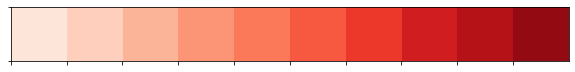

In [6]:
import seaborn as sns
palette = sns.color_palette(None, 3)
sns.palplot(sns.color_palette("Reds", 10))

In [23]:
import numpy as np
(np.asarray(sns.color_palette("Reds", 10)) * 255).astype(int)

array([[254, 229, 218],
       [253, 207, 188],
       [252, 180, 153],
       [252, 149, 117],
       [251, 120,  88],
       [246,  89,  63],
       [236,  56,  42],
       [208,  29,  31],
       [181,  18,  24],
       [147,  10,  18]])

In [24]:
[[] * i for i in range(5)]

[[], [], [], [], []]

In [678]:
#########################################################################
# Version: 8                                                            #
# Feature: Scaleable version with gready approach to GTP allocation     #


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib.colors import ColorConverter
from copy import copy
from random import randint
import seaborn as sns
import random


class simple_conveyor():

######## INITIALIZATION OF VARIABLES ###############################################################################################################
    def __init__(self, queues, amount_gtp=3, amount_output=3):
        """initialize states of the variables, the lists used"""
        #init queues
        self.queues = queues
        self.init_queues = self.queues
        self.demand_queues = copy(self.queues)
        self.in_queue = [[] for item in range(len(queues))]



        #init config
        self.amount_of_gtps = amount_gtp
        self.amount_of_outputs = amount_output
        self.exception_occurence = 0.05        # % of the times, an exception occurs
        self.process_time_at_GTP = 45          # takes 30 timesteps

        self.reward = 0.0
        self.terminate = False

        #colors
        self.pallette = (np.asarray(sns.color_palette("Reds", self.amount_of_outputs)) * 255).astype(int)

        # build env
        self.empty_env = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)

        #define where the operators, diverts and outputs of the GTP stations are
        self.operator_locations = [[i, self.empty_env.shape[0]-1] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        self.output_locations = [[i,7]for i in range(self.empty_env.shape[1]-self.amount_of_outputs*2-1,self.empty_env.shape[1]-2,2)]
        self.diverter_locations = [[i, 7] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        self.merge_locations = [[i-1, 7] for i in range(4,self.amount_of_gtps*4+1,4)][::-1]
        print("operator locations: ", self.operator_locations)
        print("output locations: ", self.output_locations)
        print("diverter locations: ", self.diverter_locations)
        print("Merge locations: ", self.merge_locations)

        #initialize divert points: False=no diversion, True=diversion
        self.D_states = {}
        for i in range(1,len(self.diverter_locations)+1):
            self.D_states[i] = False
        
        #initialize output points
        self.O_states = {}
        for i in range(1,len(self.output_locations)+1):
            self.O_states[i] = 0

        # initialize transition points: 0=no transition, 1=transition
        self.T_states = {}
        for i in range(1,len(self.operator_locations)+1):
            self.T_states[i] = False

        #initialize merge points
        self.M_states = {}
        for i in range(1,len(self.merge_locations)+1):
            self.M_states[i] = False

####### FOR SIMULATION ONLY 
        self.W_times = {}
        for i in range(1,len(self.operator_locations)+1):
            self.W_times[i] = self.process_time_at_GTP + 145 + randint(-10, 10)
        print("Process times at operator are:", self.W_times)
####### FOR SIMULATION ONLY

        #initialize conveyor memory
        self.items_on_conv = []        
        self.carrier_type_map = np.zeros((self.empty_env.shape[0],self.empty_env.shape[1],1))

#### Generate the visual conveyor ##########################################################################################################

    def generate_env(self, no_of_gtp, no_of_output):
        """returns empty env, with some variables about the size, lanes etc."""
        empty = np.zeros((15, 4*no_of_gtp + 4 + 3*no_of_output +2, 3))                   # height = 15, width dependent on amount of stations
        for i in range(2,empty.shape[1]-2):
            empty[2][i]=(255,255,255)                               #toplane = 2
            empty[7][i]=(255,255,255)                               #bottom lane = 7
        for i in range(2,8):
            empty[i][1]=(255,255,255)                               #left lane
            empty[i][empty.shape[1]-2]=(255,255,255)                #right lane

        for i in range(8,empty.shape[0]): 
            for j in range(4,no_of_gtp*4+1,4):                      #GTP lanes
                empty[i][j] = (255,255,255)                         #Gtp in
                empty[i][j-1] = (250, 250,250)                      #gtp out
            for j in range(empty.shape[1]-no_of_output*2-1,empty.shape[1]-2,2):   #order carrier lanes
                empty[i][j] = (255,255,255)
        for i in range(4,no_of_gtp*4+1, 4):                         #divert and merge points
            empty[7][i-1] = (255, 242, 229)                         #merge
            empty[7][i] = (255, 242, 229)                           #divert

        for i in range(empty.shape[1]-no_of_output*2-1,empty.shape[1]-2,2):       #output points
            empty[7][i] = (255, 242, 229)
        
        for i in range(8,empty.shape[0],1):                                     #order carriers available in lanes
            for j in range(empty.shape[1]-no_of_output*2-1,empty.shape[1]-2,2):
                x= empty.shape[1]-no_of_output*2-1
                empty[i][j] = self.pallette[int((j-x)*0.5)]

        return empty

###### HELPER FUNCTIONS ############################################################################################################################
    def get_candidate_lists(self, list_lists, x):
        """Returns all lists, starting with x in list of lists"""
        return [nestedlist for nestedlist in list_lists if nestedlist[0] == x]

    def len_longest_sublist(self, listoflists):
        """returns length of the longest list in the sublists"""
        try:
            return max([len(sublist) for sublist in listoflists]) 
        except:
            return 0

    def len_shortest_sublist(self, listoflists):
        """returns length of the shortest list in the sublists"""
        return min([len(sublist) for sublist in listoflists])
        
    def update_queues(self, quenr, variable):
        'For a given queue 1-3, add a variable (1,2,3)'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[i].append(variable)
            
    def remove_from_queue(self, quenr):
        'For a given queue 1-3, remove the first in the queue'
        for i in range(self.amount_of_gtps):
            if quenr == i+1:
                self.init_queues[i]= self.init_queues[i][1:]

    def add_to_in_que(self, que_nr, to_add):
        'for a given queue, add item to the queue'
        self.in_queue[que_nr].append(to_add)

    
    def simulate_operator_action(self):
        'processes an item at all the GTP stations, currently just accepts the item allways'
        self.items_on_conv = [sublist for sublist in self.items_on_conv if sublist[0] not in self.operator_locations]
 ########################################################################################################################################################       
 ## RESET FUNCTION 
 #            
    def reset(self):
        "reset all the variables to zero, empty queues"
        self.D_states = {}
        for i in range(1,len(self.diverter_locations)+1):
            self.D_states[i] = False
        
        #initialize output points
        self.O_states = {}
        for i in range(1,len(self.output_locations)+1):
            self.O_states[i] = 0
        
        # initialize transition points: 0=no transition, 1=transition
        self.T_states = {}
        for i in range(1,len(self.operator_locations)+1):
            self.T_states[i] = False

        #initialize merge points
        self.M_states = {}
        for i in range(1,len(self.merge_locations)+1):
            self.M_states[i] = False

####### FOR SIMULATION ONLY 
        self.W_times = {}
        for i in range(1,len(self.operator_locations)+1):
            self.W_times[i] = self.process_time_at_GTP + 145 + randint(-10, 10)
        #print("Process times at operator are:", self.W_times)
####### FOR SIMULATION ONLY

        #empty amount of items on conv.
        self.items_on_conv = []
        
        
        self.init_queues = self.queues
        self.demand_queues = copy(self.queues)
        self.in_queue = [[] for item in range(len(self.queues))]
        self.empty_env = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)
        self.carrier_type_map = np.zeros((self.empty_env.shape[0],self.empty_env.shape[1],1))

########################################################################################################################################################
## PROCESSING OF ORDER CARRIERS AT GTP
# 
    def process_at_GTP(self):
        # for each step; check if it needed to process an order carrier at GTP
        O_locs = copy(self.operator_locations)
        for Transition_point in O_locs:
            if self.W_times[O_locs.index(Transition_point)+1] == 0:
                #print('Waiting time at GTP {} is 0, check done on correctness:'.format(O_locs.index(Transition_point)+1))
                if random.random() < self.exception_occurence: #if the random occurence is below 0.02 (with a change of 2%) do:
                    #move order carrier at transition point to the merge lane
                    #print('not the right order carrier, move to merge lane')
                    for item  in self.items_on_conv:
                        if item[0] == Transition_point:
                            item[0][0] -=1
                    
                else:
                    #remove the order form the items_on_conv
                    #print('right order carrier is at GTP (location: {}'.format(Transition_point))
                    #print('conveyor memory before processing: ', self.items_on_conv)
                    self.items_on_conv = [item for item in self.items_on_conv if item[0] !=Transition_point]
                    #print('order at GTP {} processed'.format(O_locs.index(Transition_point)+1))
                    #print('conveyor memory after processing: ', self.items_on_conv)
                    self.reward += 10 + 10 + (self.amount_of_gtps * 4)/2

                #set new timestep for the next order
                self.W_times[O_locs.index(Transition_point)+1] = self.process_time_at_GTP if "carrier_type_-1" == 1 else self.process_time_at_GTP+10 if "carrier_type_-1" == 2 else self.process_time_at_GTP+20 if "carrier_type_-1" == 3 else self.process_time_at_GTP+30 if "carrier_type_-1" == 4 else self.process_time_at_GTP+40
                #print('new timestep set')

                #remove from in_queue when W_times is 0
                try:
                    #remove item from the In_que list
                    self.in_queue[O_locs.index(Transition_point)] = self.in_queue[O_locs.index(Transition_point)][1:]
                    #print('item removed from in-que')
                except:
                    print("Except: queue was already empty!")
            elif self.W_times[O_locs.index(Transition_point)+1] < 0:
                self.W_times[O_locs_locations.index(Transition_point)+1] = 0
                #print("Waiting time was below 0, reset to 0")
            else:
                self.W_times[O_locs.index(Transition_point)+1] -= 1 #decrease timestep with 1
                #print('waiting time decreased with 1 time instance')
                #print('waiting time at GTP{} is {}'.format(O_locs.index(Transition_point)+1, self.W_times[O_locs.index(Transition_point)+1]))
            

########################################################################################################################################################
## STEP FUNCTION
#
    def step_env(self):

####make carrier type map
        self.carrier_type_map = np.zeros((env.empty_env.shape[0],env.empty_env.shape[1],1)).astype(int)
        for item in self.items_on_conv:
            self.carrier_type_map[item[0][1]][item[0][0]] = item[1]
            item[2] +=1

#### Process the orders at GTP > For simulation: do incidental transfer of order carrier
        self.process_at_GTP()

####toggle diverters if needed
        #toggle All D_states if needed:
        d_locs = copy(self.diverter_locations)
        carrier_map = copy(self.carrier_type_map)
        for loc2 in d_locs:
            try:
                #Condition 1 = if the carrier type at any of the diverter locations is EQUAL TO the next-up requested carrier type at GTP request lane of this specific diverter location
                condition_1 = carrier_map[loc2[1]][loc2[0]] == self.init_queues[d_locs.index(loc2)][0]
                #condition 2 = if the lenght of the in_queue is <= smallest queue that also demands order carrier of the same type
                condition_2 = len(self.in_queue[d_locs.index(loc2)]) <= min(map(len, self.in_queue)) 
                if condition_1 and condition_2: 
                    self.D_states[d_locs.index(loc2)+1] = True
                    #print("set diverter state for diverter {} to TRUE".format(d_locs.index(loc2)+1))
                    self.remove_from_queue(d_locs.index(loc2)+1)
                    #print("request removed from demand queue")
                    self.add_to_in_que(d_locs.index(loc2),int(carrier_map[loc2[1]][loc2[0]]))
                    #print("Order carrier added to GTP queue")

                else:
                    self.D_states[d_locs.index(loc2)+1] = False
                    #print("Divert-set requirement not met at cord :", loc2)
            except IndexError:
                #print('Index error: queues are empty?')
                self.D_states[d_locs.index(loc2)+1] = False
            except:
                #print('Another error occurred; this should not happen! Investigate the cause!')
                self.D_states[d_locs.index(loc2)+1] = False



        

####Divert when at diverter, and diverter is set to true
####Do step for all items on conv
        for item in self.items_on_conv:
            #check diverters; is any of them True and is there an order carrier? move into lane.
            if item[0] in self.diverter_locations:
                try:
                    if self.D_states[self.diverter_locations.index(item[0])+1] == True:
                        item[0][1] +=1
                        #print("moved order carrier into GTP lane {}".format(self.diverter_locations.index(loc1)+1))
                    else:
                        item[0][0] -=1 
                except:
                    #print("Item of size {} not moved into lane: Divert value not set to true".format(item[1])) 
                    pass
                
            #otherwise; all items set a step in their moving direction 
            elif item[0][1] == 7 and item[0][0] > 1 and self.carrier_type_map[item[0][1]][item[0][0]-1] ==0: #if on the lower line, and not reached left corner:
                item[0][0] -=1                     #move left
                #print('item {} moved left'.format(item[0]))
            elif item[0][0] ==1 and item[0][1] >2 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #if on left lane, and not reached top left corner:
                item[0][1] -=1
                #print('item {} moved up'.format(item[0]))                    #move up
            elif item[0][1] == 2 and item[0][0] < self.empty_env.shape[1]-2 and self.carrier_type_map[item[0][1]][item[0][0]+1] ==0: #if on the top lane, and not reached right top corner:
                item[0][0] +=1                      #Move right
                #print('item {} moved right'.format(item[0]))
            elif item[0][0] == self.empty_env.shape[1]-2 and item[0][1] <7 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #if on right lane, and not reached right down corner:
                item[0][1] +=1
                #print('item {} moved down'.format(item[0]))
            elif item[0][1] > 7 and item[0][0] in [lane[0] for lane in self.diverter_locations] and item[0][1] < self.empty_env.shape[0]-1 and item[0][0] < self.amount_of_gtps*4+3 and self.carrier_type_map[item[0][1]+1][item[0][0]] ==0: #move down into lane
                item[0][1] +=1
                #print('item {} moved into lane'.format(item[0]))
            elif item[0][1] > 7 and item[0][0] in [lane[0] for lane in self.merge_locations] and item[0][0] < self.amount_of_gtps*4+3 and self.carrier_type_map[item[0][1]-1][item[0][0]+1] ==0: #move up into merge lane
                item[0][1] -=1
            elif item[0][1] > 7 and item[0][0] > self.amount_of_gtps*4+3 and self.carrier_type_map[item[0][1]-1][item[0][0]] ==0: #move up if on output lane
                item[0][1] -=1
                #print('item {} moved onto conveyor'.format(item[0]))

        ####try to add new item from output when On!=0
        for cord2 in self.output_locations:
            loc =copy(cord2)
            if self.O_states[self.output_locations.index(loc)+1] !=0 and self.carrier_type_map[cord2[1]][cord2[0]+1] ==0:
                self.items_on_conv.append([loc,self.output_locations.index(loc)+1, 0])
                self.O_states[self.output_locations.index(loc)+1] -=1
                #print("Order carrier outputted at {}".format(loc))
                #print("Items on conveyor: ", self.items_on_conv)
            else:
                #print('No order carrier output on output {} .'.format(loc))
                pass

    def make_observation(self):
        '''Builds the observation from the available variables'''
        in_queue = []
        for item in self.in_queue:
            in_queue.append(item + [0]*(10-len(item)))
        in_queue = np.array(in_queue).flatten()
        demand_que = np.array([item[:10] for item in self.demand_queues]).flatten()
        carrier_type_map_obs = np.zeros((self.empty_env.shape[0],self.empty_env.shape[1],2)).astype(int)
        for item in self.items_on_conv:
            carrier_type_map_obs[item[0][1]][item[0][0]][0] = item[1]
            carrier_type_map_obs[item[0][1]][item[0][0]][1] = item[2]
        obs_queues = np.append(in_queue, demand_que)
        obs = np.append(obs_queues, carrier_type_map_obs.flatten())
        return obs

    def step(self, action):
        if action==0:
            self.step_env()
            #print("- - action 0 executed")
            #print("Divert locations :", self.diverter_locations)
            #print('states of Divert points = {}'.format(self.D_states))
        elif action ==1: 
            self.O_states[1] +=1
            self.step_env()
            #print("- - action 1 executed")
        elif action ==2:
            self.O_states[2] +=1
            self.step_env()
            #print("- - action 2 executed")
        elif action ==3:
            self.O_states[3] +=1
            self.step_env()
            #print("- - action 3 executed")
        elif action ==4:
            self.O_states[4] +=1
            self.step_env()
        elif action ==5:
            self.O_states[5] +=1
            self.step_env()
        elif action ==6:
            self.O_states[6] +=1
            self.step_env()

        #print("states of O: ",self.O_states)
        #print('init queues :', self.init_queues)
        #print('conveyor memory : ', self.items_on_conv)
        #print('')
        #print('--------------------------------------------------------------------------------------------------------------------')

        next_state = self.make_observation()
        reward = self.reward
        terminate = self.terminate
        info = ''
        return next_state, reward, terminate, info

   

################## RENDER FUNCTIONS ################################################################################################
    def render_plt(self):
        """Simple render function, uses matplotlib to render the image + some additional information on the transition points"""
        #print('items on conveyor:')
        #print(self.items_on_conv)
        #print('states of Divert points = {}'.format(self.D_states))
        #print('states of Output points = {}'.format(self.O_states))
        #for queue in self.init_queues:
            #print('Queue GTP{}: {}'.format(self.init_queues.index(queue), queue))

        image = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([self.pallette[0] if item[1] ==1 else self.pallette[1] if item[1] ==2 else self.pallette[2] if item[1] ==3 else self.pallette[3]]) 
        fig  = plt.figure(figsize=(20,10))
        plt.imshow(np.asarray(image).astype(int))
        plt.show()
    

    def render(self):
        """render with opencv, for faster processing"""
        image = self.generate_env(self.amount_of_gtps, self.amount_of_outputs)

        for item in self.items_on_conv:
            image[item[0][1]][item[0][0]] = np.asarray([self.pallette[0] if item[1] ==1 else self.pallette[1] if item[1] ==2 else self.pallette[2] if item[1] ==3 else self.pallette[3]]) 

        #resize with PIL
        im = Image.fromarray(np.uint8(image))
        img = im.resize((1200,480), resample=Image.BOX) #BOX for no anti-aliasing)
        cv2.imshow("Simulation-v0.1", cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))
        cv2.waitKey(25)
    



In [679]:
############### MAIN ##############################################################################################################################################

## Test the item
#queues = [[1,2,3,2,3], [2,3,1,3,1], [1,3,2,1,2], [1,3,2,1,2], [1,3,2,1,2]] #sample queues for format WHERE 1=S, 2=M, 3=L
amount_gtp = 10
amount_output = 3
buffer_size = 100
queues = [[randint(1,amount_output) for i in range(buffer_size)] for item in range(amount_gtp)] # generate random queues
print(queues)
env = simple_conveyor(queues, amount_gtp, amount_output)
env.reset()

#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]
print("Resulting in sequence of actions: ", order_list)


[[3, 2, 1, 3, 2, 3, 2, 1, 3, 2, 3, 1, 3, 1, 2, 1, 2, 3, 3, 3, 2, 2, 1, 2, 2, 3, 3, 1, 3, 3, 3, 2, 3, 2, 3, 2, 1, 1, 3, 1, 2, 2, 3, 2, 1, 2, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 1, 2, 1, 3, 1, 1, 3, 2, 2, 1, 1, 1, 2, 3, 3, 2, 3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 1, 3, 3, 2, 2, 2, 3], [1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 3, 3, 2, 2, 2, 3, 1, 1, 3, 1, 2, 1, 3, 2, 2, 2, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 2, 3, 2, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 2, 3, 2, 1, 2, 1, 2, 1, 1, 3, 2, 1, 2, 2, 3, 3, 3, 1, 2, 2, 1, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2], [1, 2, 2, 2, 3, 2, 2, 3, 3, 1, 1, 2, 1, 2, 3, 2, 1, 3, 3, 1, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 3, 1, 2, 3, 2, 3, 1, 1, 1, 2, 1, 3, 3, 2, 1, 3, 2, 3, 1, 2, 3, 2, 1, 1, 2, 2, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 3], [3, 3, 1, 3, 1, 3, 2, 2, 2, 1, 2, 1, 3, 2, 3, 1, 2, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2,

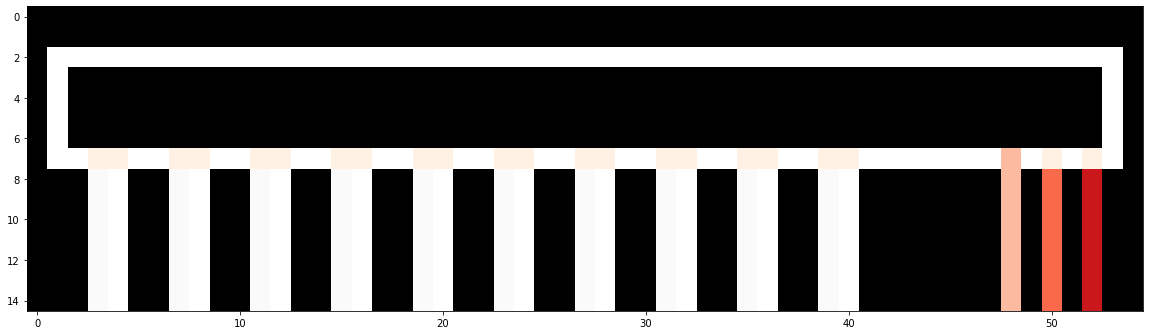

1850

In [680]:
state, reward, done, info = env.step(1)
env.render_plt()
len(state)

In [683]:
Transition_point = env.operator_locations[0]

In [686]:
[Transition_point[0], Transition_point[1]-1]

[40, 13]

In [603]:
demand = [1, 3, 2, 1, 3, 2, 1, 4, 2, 4, 3, 2, 1, 3]
in_queue = [3, 2, 1, 3, 2, 1, 4]

In [604]:
previous = 0
sequence = []

for i in range(len(demand)):
    try:
        previous = in_queue.index(demand[i], previous, len(demand)+1)
        sequence.append(previous)
    except:
        break
sequence

[2, 3, 4, 5]

In [687]:
for_analysis =  [[[40, 14], 2, 232], [[36, 14], 3, 230], [[36, 13], 3, 228], [[40, 13], 1, 225], [[24, 14], 2, 224], [[20, 14], 2, 222], [[20, 13], 2, 220], [[16, 14], 2, 218], [[12, 14], 2, 216], [[32, 14], 3, 214], [[28, 14], 1, 212], [[24, 13], 3, 210], [[32, 13], 2, 207], [[28, 13], 1, 204], [[12, 13], 3, 204], [[8, 14], 2, 201], [[16, 13], 1, 198], [[4, 14], 3, 198], [[8, 13], 2, 195], [[4, 13], 1, 192], [[8, 8], 3, 192], [[24, 8], 3, 190], [[8, 12], 2, 187], [[12, 12], 3, 186], [[8, 11], 3, 184], [[28, 8], 3, 182], [[16, 12], 2, 179], [[20, 12], 3, 178], [[7, 2], 2, 175], [[16, 11], 1, 172], [[40, 9], 2, 172], [[28, 12], 3, 170], [[32, 12], 2, 167], 
[[28, 11], 2, 166], [[32, 11], 2, 164], [[3, 7], 2, 162], [[12, 11], 1, 159], [[4, 12], 1, 158], [[40, 12], 3, 156], [[4, 11], 2, 153], [[13, 7], 2, 152], [[15, 7], 2, 150], [[16, 7], 1, 147], [[8, 10], 2, 146], [[36, 12], 3, 
144], [[36, 11], 3, 142], [[16, 10], 2, 139], [[12, 10], 2, 138], [[12, 9], 2, 136], [[24, 12], 3, 134], [[20, 11], 3, 132], [[20, 10], 3, 130], [[16, 9], 1, 127], [[28, 10], 2, 126], [[24, 11], 2, 124], [[24, 10], 3, 122], [[32, 10], 1, 120], [[36, 10], 2, 118], [[8, 9], 3, 116], [[40, 11], 2, 113], [[28, 9], 2, 112], [[24, 9], 2, 110], [[53, 3], 2, 108], [[40, 10], 3, 106], [[36, 9], 3, 104], [[47, 2], 2, 101], [[46, 2], 2, 100], [[4, 10], 3, 98], [[40, 2], 3, 96], [[38, 2], 3, 94], [[4, 9], 2, 91], [[36, 2], 2, 90], [[34, 2], 2, 88], [[32, 2], 2, 86], [[12, 8], 3, 84], [[16, 8], 2, 81], [[26, 2], 2, 80], [[20, 9], 2, 78], [[21, 2], 2, 75], [[20, 8], 2, 72], [[32, 9], 1, 71], [[16, 2], 2, 70], [[14, 2], 2, 68], [[4, 8], 3, 66], [[36, 8], 2, 63], [[32, 8], 2, 62], [[6, 2], 2, 60], [[3, 2], 2, 57], [[1, 3], 3, 56], [[40, 8], 2, 53], [[1, 5], 2, 52], [[4, 7], 3, 49], [[5, 7], 3, 48], [[7, 7], 3, 46], [[9, 7], 3, 44], [[11, 7], 3, 42], [[12, 7], 2, 39], [[14, 7], 2, 37], [[17, 7], 2, 34], [[18, 7], 2, 33]]

In [688]:
sortedl = [item[0] for item in for_analysis]
sortedl = sorted(sortedl, key=lambda x: x[1])
sorted(sortedl, key=lambda x: x[0])

[[1, 3],
 [1, 5],
 [3, 2],
 [3, 7],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [4, 11],
 [4, 12],
 [4, 13],
 [4, 14],
 [5, 7],
 [6, 2],
 [7, 2],
 [7, 7],
 [8, 8],
 [8, 9],
 [8, 10],
 [8, 11],
 [8, 12],
 [8, 13],
 [8, 14],
 [9, 7],
 [11, 7],
 [12, 7],
 [12, 8],
 [12, 9],
 [12, 10],
 [12, 11],
 [12, 12],
 [12, 13],
 [12, 14],
 [13, 7],
 [14, 2],
 [14, 7],
 [15, 7],
 [16, 2],
 [16, 7],
 [16, 8],
 [16, 9],
 [16, 10],
 [16, 11],
 [16, 12],
 [16, 13],
 [16, 14],
 [17, 7],
 [18, 7],
 [20, 8],
 [20, 9],
 [20, 10],
 [20, 11],
 [20, 12],
 [20, 13],
 [20, 14],
 [21, 2],
 [24, 8],
 [24, 9],
 [24, 10],
 [24, 11],
 [24, 12],
 [24, 13],
 [24, 14],
 [26, 2],
 [28, 8],
 [28, 9],
 [28, 10],
 [28, 11],
 [28, 12],
 [28, 13],
 [28, 14],
 [32, 2],
 [32, 8],
 [32, 9],
 [32, 10],
 [32, 11],
 [32, 12],
 [32, 13],
 [32, 14],
 [34, 2],
 [36, 2],
 [36, 8],
 [36, 9],
 [36, 10],
 [36, 11],
 [36, 12],
 [36, 13],
 [36, 14],
 [38, 2],
 [40, 2],
 [40, 8],
 [40, 9],
 [40, 10],
 [40, 11],
 [40, 12],
 [40, 13],
 [40, 14],
 [46

In [245]:
in_queue = []
for item in env.in_queue:
    in_queue.append(item + [0]*(10-len(item)))
in_queue = np.array(in_queue).flatten()

In [246]:
demand = np.array([item[:10] for item in env.demand_queues]).flatten()

In [248]:
np.append(in_queue, demand, demand)

TypeError: only integer scalar arrays can be converted to a scalar index

In [152]:
def vec_bin_array(arr, m):
    """
    Arguments: 
    arr: Numpy array of positive integers
    m: Number of bits of each integer to retain

    Returns a copy of arr with every element replaced with a bit vector.
    Bits encoded as int8's.
    """
    to_str_func = np.vectorize(lambda x: np.binary_repr(x).zfill(m))
    strs = to_str_func(arr)
    ret = np.zeros(list(arr.shape) + [m], dtype=np.int8)
    for bit_ix in range(0, m):
        fetch_bit_func = np.vectorize(lambda x: x[bit_ix] == '1')
        ret[...,bit_ix] = fetch_bit_func(strs).astype("int8")

    return ret 

In [257]:
new_arr = vec_bin_array(state, 12).flatten()
new_arr.shape

(22200,)

In [171]:
vec_bin_array(np.array([[item[0][0], item[0][1], item[1], item[2]] for item in env.items_on_conv]).flatten(), 12).flatten()

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int8)

In [168]:
np.array([[item[0][0], item[0][1], item[1], item[2]] for item in env.items_on_conv])

array([[28, 14,  1, 37],
       [20, 14,  1, 36],
       [40, 14,  2, 35],
       [36, 14,  3, 34]])

In [104]:
new_queues = []
for item in env.in_queue:
    new_queues.append(item + [0]*(5-len(item)))
new_queues

[[1, 0, 0, 0, 0],
 [2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [172]:
env.items_on_conv

[[[28, 14], 1, 37], [[20, 14], 1, 36], [[40, 14], 2, 35], [[36, 14], 3, 34]]

In [174]:
env.carrier_type_map

array([[[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0

In [565]:
len(env.items_on_conv)

12

In [198]:
carrier_type_map_obs = np.zeros((env.empty_env.shape[0],env.empty_env.shape[1],2)).astype(int)
for item in env.items_on_conv:
    carrier_type_map_obs[item[0][1]][item[0][0]][0] = item[1]
    carrier_type_map_obs[item[0][1]][item[0][0]][1] = item[2]
carrier_type_map_obs

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]])

In [188]:
carrier_type_map_2.flatten()

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
list1 = [0,0,0,0,0]
list2 = [2,3]
np.maximum(list1, list2)

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [ ]:

#run short trail:
env.reset()

for item in order_list:
    env.step(item)
    env.render()
    for _ in range(4):
        env.step(0)
        env.render()


    
while env.in_queue != [[] * i for i in range(amount_gtp)]:
    env.step(0)
    env.render()
